# Library imports & Dataset loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df  = pd.read_csv(r"multipleChoiceResponses.csv")
df.head(5)

C:\Users\gosta\AppData\Local\Temp\ipykernel_2424\426750440.py:6: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv(r"multipleChoiceResponses.csv")


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_P

# Findings

- "_TEXT" & "_OTHER" columns: Do not hold actual useful values, but rather just numerical indicators that show if a person chose one of the provided choices or chose to input his own answer.
> Verdict: Dropp all "_TEXT" and "_OTHER" columns.
- "Part" columns: These columns represent "Select all that apply" part of the survey.
  - Since these can be repeated and cause issues, I will also map descriptive keywords to each question 
> Change: Turn them into binary flags and rename the columns with the available selections.
- Other "Question" columns: I will manually inspect the question and rename the columns accordingly
> Rename: Rename "Question" columns with meaningful names  
> Finally: I can drop the questions row (0)

In [2]:
for i in df.columns:
    if i.endswith("_TEXT") or i.endswith("_OTHER"):
         df.drop(columns=i, inplace = True)

In [3]:
question_map = {
    "Q11" : "job_activities_",
    "Q12_MULTIPLE_CHOICE" : "primary_tool_for_data_analysis_",
    "Q13": "ide_",            
    "Q14": "used_hosted_notebooks_", 
    "Q15": "used_cloud_computing_service_", 
    "Q16": "used_languages_",    
    "Q19": "used_ml_framework_", 
    "Q21": "used_data_visualization_libraries_tools_", 
    "Q27": "used_cloud_computing_product_",    
    "Q28": "used_ml_learning_product_",  
    "Q29": "used_database_products_", 
    "Q30": "used_big_data_products_", 
    "Q31": "ml_products_used_",      
    "Q33": "dataset_provider_", 
    "Q34": "time_for_data_science_project_",      
    "Q35": "percentage_of_ml_or_data_science_training_", 
    "Q36": "platform_used_for_courses_",     
    "Q38": "favorite_media_source_", 
    "Q39": "quality_of_online_learning_platforms_",  
    "Q41": "importance_of_topics_", 
    "Q42": "metrics_of_successful_model_",
    "Q44": "view_on_ensuring_unbiased_difficulty_", 
    "Q45": "model_insight_contexts_",
    "Q47": "interpretation_methods_",
    "Q49": "reproducibility_tools_",
    "Q50": "reproducibility_barriers_"
}

In [4]:
for i in df.columns:
    if "Part" in i:
        df.loc[1:,i] = df.loc[1:,i].notna().astype(int)
        Selection = str(df[i].iloc[0]).rsplit(" - ", 1)[1]
        Selection = str(question_map.get(i.split("_")[0]) + Selection).lower().replace(" ", "_")
        df.rename(columns={i : Selection}, inplace = True)

In [5]:
df.rename(columns={
    "Q1" : "gender",
    "Q2" : "age",
    "Q3" : "country",
    "Q4" : "education_level",
    "Q5" : "undergraduate_major",
    "Q6" : "current_role",
    "Q7" : "industry",
    "Q8" : "years_of_experience",
    "Q9" : "yearly_salary_usd",
    "Q10" : "employer_uses_machine_learning_methods",
    "Q17" : "most_used_programming_language",
    "Q18" : "recommend_programming_language_to_learn",
    "Q20" : "most_used_ml_library",
    "Q22" : "most_used_data_visualization_library_or_tool",
    "Q23" : "percent_time_spent_coding",
    "Q24" : "years_coding_to_analyze_data",
    "Q25" : "years_using_machine_learning",
    "Q26" : "self_identified_data_scientist",
    "Q32" : "most_frequent_type_of_data",
    "Q37" : "most_used_online_platform",
    "Q40" : "expertise_better_demonstrated_by",
    "Q43" : "percent_projects_bias_analysis",
    "Q46" : "percent_projects_model_insights",
    "Q48" : "views_on_ml_models_as_black_boxes"
    }, inplace = True)

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(r'[^a-z0-9]+', '_', regex=True)
df.columns = df.columns.str.strip('_')


In [6]:
df = df.iloc[1:].reset_index(drop=True)

In [7]:
df.head()

,time_from_start_to_finish_seconds,gender,age,country,education_level,undergraduate_major,current_role,industry,years_of_experience,yearly_salary_usd,employer_uses_machine_learning_methods,job_activities_analyze_and_understand_data_to_influence_product_or_business_decisions,job_activities_build_and_or_run_a_machine_learning_service_that_operationally_improves_my_product_or_workflows,job_activities_build_and_or_run_the_data_infrastructure_that_my_business_uses_for_storing_analyzing_and_operationalizing_data,job_activities_build_prototypes_to_explore_applying_machine_learning_to_new_areas,job_activities_do_research_that_advances_the_state_of_the_art_of_machine_learning,job_activities_none_of_these_activities_are_an_important_part_of_my_role_at_work,job_activities_other,q12_multiple_choice,ide_jupyter_ipython,ide_rstudio,ide_pycharm,ide_visual_studio_code,ide_nteract,ide_atom,ide_matlab,ide_visual_studio,ide_notepad,ide_sublime_text,ide_vim,ide_intellij,ide_spyder,ide_none,ide_other,used_hosted_notebooks_kaggle_kernels,used_hosted_notebooks_google_colab,used_hosted_notebooks_azure_notebook,used_hosted_notebooks_domino_datalab,used_hosted_notebooks_google_cloud_datalab,used_hosted_notebooks_paperspace,used_hosted_notebooks_floydhub,used_hosted_notebooks_crestle,used_hosted_notebooks_jupyterhub_binder,used_hosted_notebooks_none,used_hosted_notebooks_other,used_cloud_computing_service_google_cloud_platform_gcp,used_cloud_computing_service_amazon_web_services_aws,used_cloud_computing_service_microsoft_azure,used_cloud_computing_service_ibm_cloud,used_cloud_computing_service_alibaba_cloud,used_cloud_computing_service_i_have_not_used_any_cloud_providers,used_cloud_computing_service_other,used_languages_python,used_languages_r,used_languages_sql,used_languages_bash,used_languages_java,used_languages_javascript_typescript,used_languages_visual_basic_vba,used_languages_c_c,used_languages_matlab,used_languages_scala,used_languages_julia,used_languages_go,used_languages_c_net,used_languages_php,used_languages_ruby,used_languages_sas_stata,used_languages_none,used_languages_other,most_used_programming_language,recommend_programming_language_to_learn,used_ml_framework_scikit_learn,used_ml_framework_tensorflow,used_ml_framework_keras,used_ml_framework_pytorch,used_ml_framework_spark_mllib,used_ml_framework_h20,used_ml_framework_fastai,used_ml_framework_mxnet,used_ml_framework_caret,used_ml_framework_xgboost,used_ml_framework_mlr,used_ml_framework_prophet,used_ml_framework_randomforest,used_ml_framework_lightgbm,used_ml_framework_catboost,used_ml_framework_cntk,used_ml_framework_caffe,used_ml_framework_none,used_ml_framework_other,most_used_ml_library,used_data_visualization_libraries_tools_ggplot2,used_data_visualization_libraries_tools_matplotlib,used_data_visualization_libraries_tools_altair,used_data_visualization_libraries_tools_shiny,used_data_visualization_libraries_tools_d3,used_data_visualization_libraries_tools_plotly,used_data_visualization_libraries_tools_bokeh,used_data_visualization_libraries_tools_seaborn,used_data_visualization_libraries_tools_geoplotlib,used_data_visualization_libraries_tools_leaflet,used_data_visualization_libraries_tools_lattice,used_data_visualization_libraries_tools_none,used_data_visualization_libraries_tools_other,most_used_data_visualization_library_or_tool,percent_time_spent_coding,years_coding_to_analyze_data,years_using_machine_learning,self_identified_data_scientist,used_cloud_computing_product_aws_elastic_compute_cloud_ec2,used_cloud_computing_product_google_compute_engine,used_cloud_computing_product_aws_elastic_beanstalk,used_cloud_computing_product_google_app_engine,used_cloud_computing_product_google_kubernetes_engine,used_cloud_computing_product_aws_lambda,used_cloud_computing_product_google_cloud_functions,used_cloud_computing_product_aws_batch,used_cloud_computing_product_azure_virtual_machines,used_cloud_computing_product_azure_container_service,used_cloud_computing_product_azure_functions,u

# Visualization

## Gender & Industry distribution
### Note: The survay contains around 19,000 males, and only 4,000 females. This will be taken into account while visualizing to get a more realistic plot

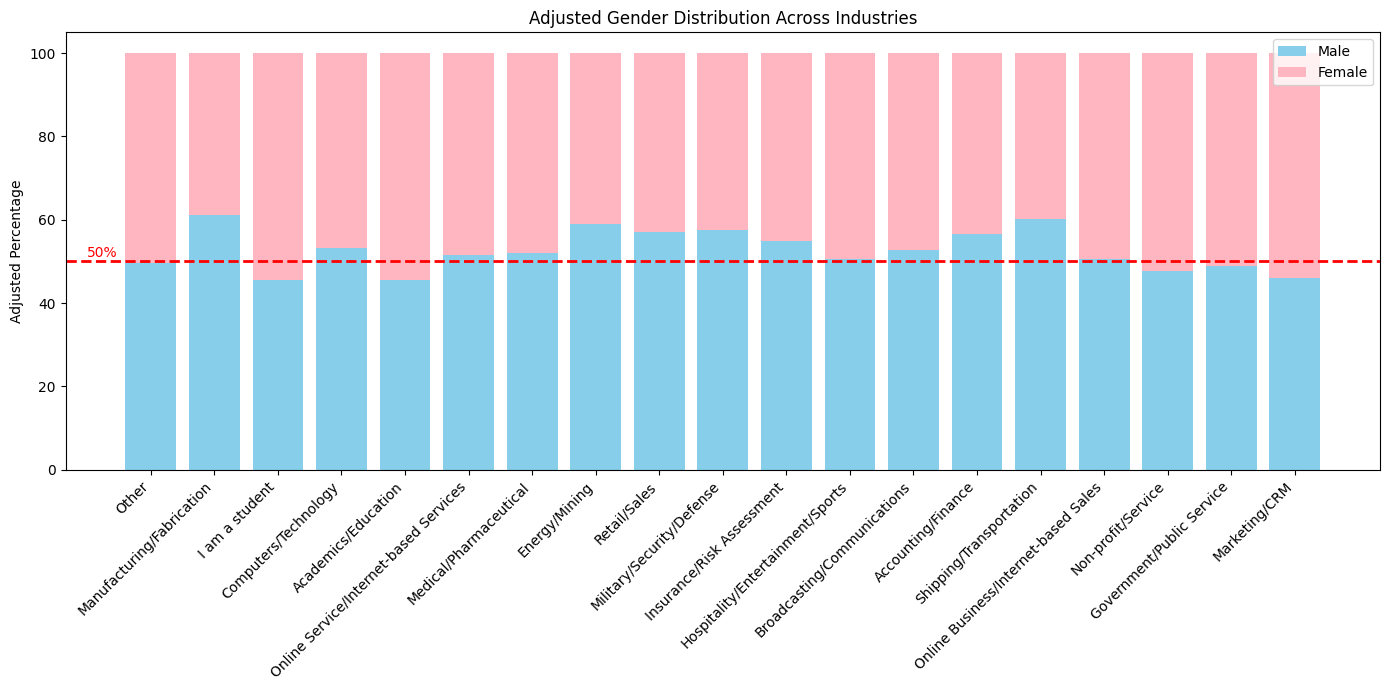

In [8]:
total_males = df['gender'].value_counts()['Male']
total_females = df['gender'].value_counts()['Female']
male_to_female_ratio = total_males / total_females

industries = df['industry'].dropna().unique()

adjusted_data = []

for i in industries:
    mask = df['industry'] == i
    males = df[mask]['gender'].value_counts()['Male']
    females = df[mask]['gender'].value_counts()['Female']

    adjusted_females = females * male_to_female_ratio
    
    total_adjusted = males + adjusted_females
    male_pct = males / total_adjusted * 100
    female_pct = adjusted_females / total_adjusted * 100
    
    adjusted_data.append([i, male_pct, female_pct])


adjusted_df = pd.DataFrame(adjusted_data, columns=['Industry', 'Male', 'Female'])

plt.figure(figsize=(14,7))
plt.bar(adjusted_df['Industry'], adjusted_df['Male'], label='Male', color='skyblue')
plt.bar(adjusted_df['Industry'], adjusted_df['Female'], bottom=adjusted_df['Male'], label='Female', color='lightpink')

plt.axhline(50, color='red', linestyle='--', linewidth=2)
plt.text(-1, 51, '50%', color='red')

plt.title('Adjusted Gender Distribution Across Industries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Adjusted Percentage')

plt.legend()
plt.tight_layout()
plt.show()

## Most Used Programming Languages by Experience Level

C:\Users\gosta\AppData\Local\Temp\ipykernel_2424\2630781604.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_exp_counts = df.groupby(['most_used_programming_language', 'years_of_experience']).size().unstack(fill_value=0)


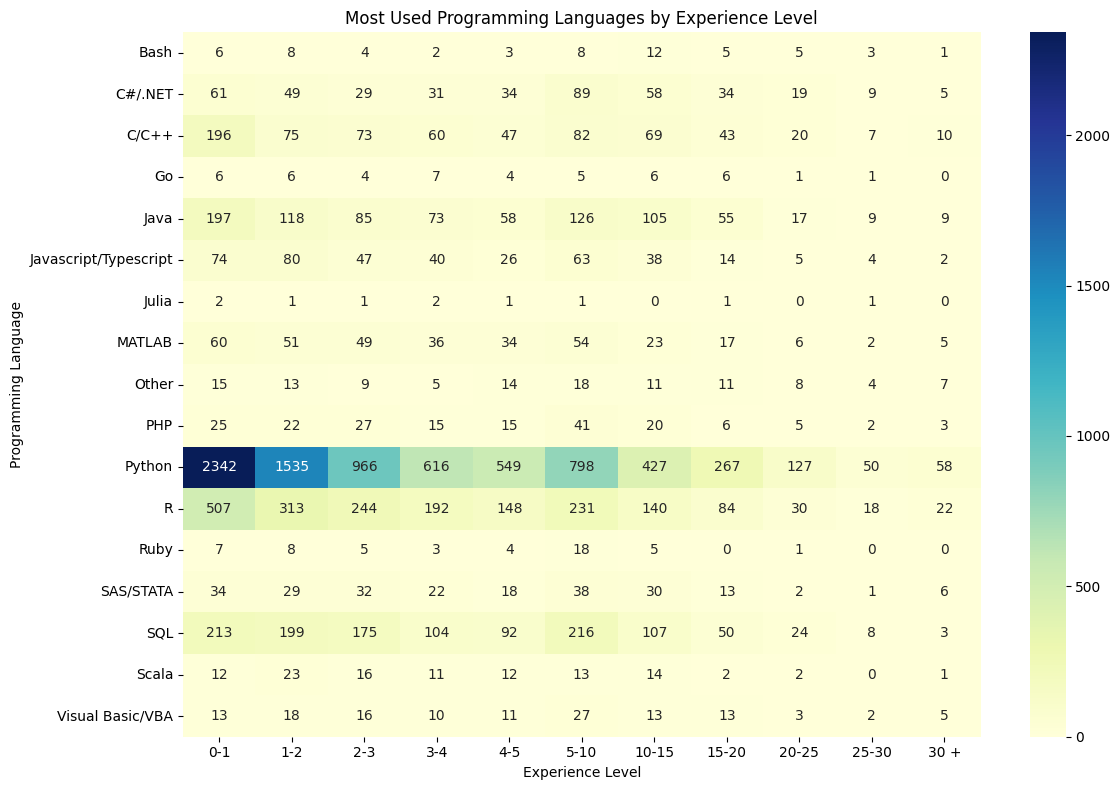

In [9]:
exp_order = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30 +"]
df['years_of_experience'] = pd.Categorical(df['years_of_experience'],categories=exp_order,ordered=True)

lang_exp_counts = df.groupby(['most_used_programming_language', 'years_of_experience']).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(lang_exp_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Most Used Programming Languages by Experience Level')
plt.ylabel('Programming Language')
plt.xlabel('Experience Level')
plt.tight_layout()
plt.show()


## How Expertise is Better Demonstrated
### Taking into account views of highly educated people

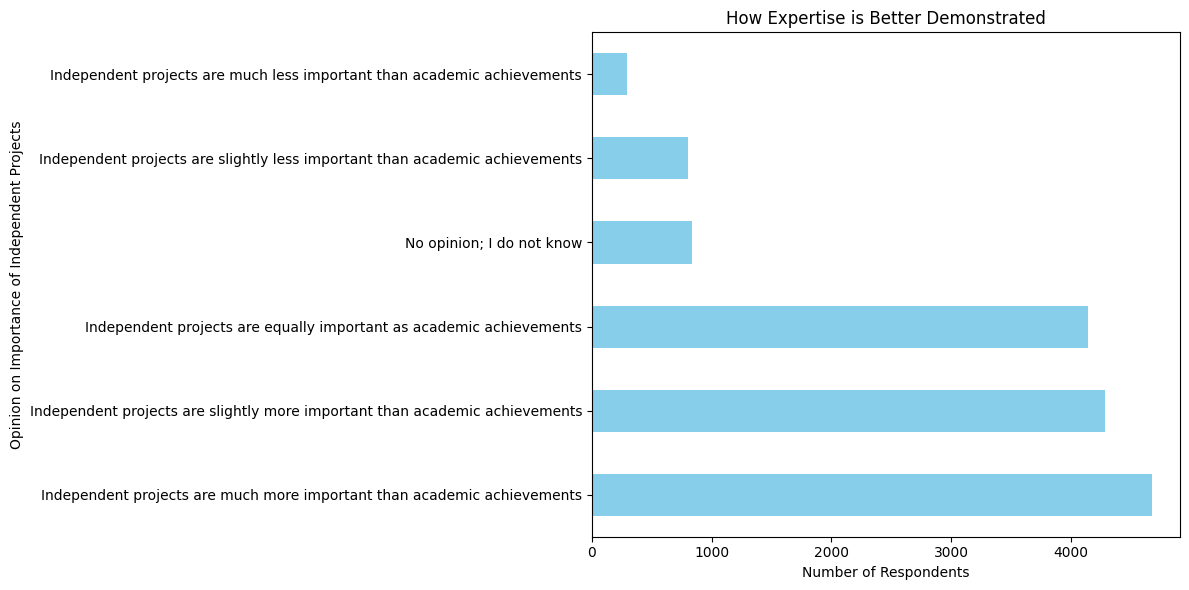

In [10]:
mask = (df['education_level'] != 'I prefer not to answer') & (df['education_level'] != 'No formal education past high school') & (df['education_level'] != 'Some college/university study without earning a bachelor’s degree')
expertise_counts = df[mask]['expertise_better_demonstrated_by'].value_counts()

plt.figure(figsize=(12,6))
ax = expertise_counts.plot(kind='barh', color='skyblue')

plt.title('How Expertise is Better Demonstrated')
plt.xlabel('Number of Respondents')
plt.ylabel('Opinion on Importance of Independent Projects')
plt.tight_layout()
plt.show()


## Most used dataset providers


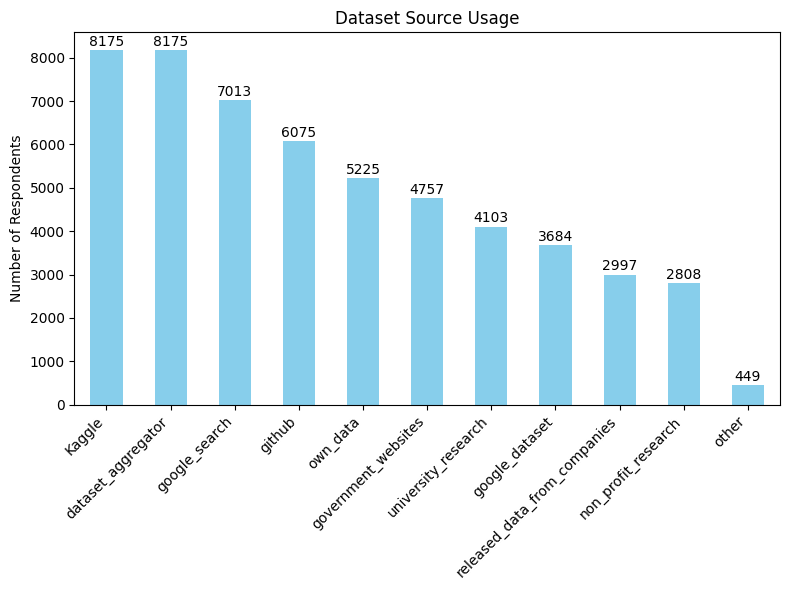

In [11]:
dataset_provider = {
    "Kaggle" : df['dataset_provider_dataset_aggregator_platform_socrata_kaggle_public_datasets_platform_etc'].sum(),
    "government_websites" : df['dataset_provider_government_websites'].sum(),
    "university_research" : df['dataset_provider_university_research_group_websites'].sum(),
    "non_profit_research" : df['dataset_provider_non_profit_research_group_websites'].sum(),
    "dataset_aggregator" : df['dataset_provider_dataset_aggregator_platform_socrata_kaggle_public_datasets_platform_etc'].sum(),
    "own_data" : df['dataset_provider_i_collect_my_own_data_web_scraping_etc'].sum(),
    "released_data_from_companies" : df['dataset_provider_publicly_released_data_from_private_companies'].sum(),
    "google_search" : df['dataset_provider_google_search'].sum(),
    "google_dataset" : df['dataset_provider_google_dataset_search'].sum(),
    "github" : df['dataset_provider_github'].sum(),
    "other" : df['dataset_provider_other'].sum()
}

dataset_series = pd.Series(dataset_provider).sort_values(ascending=False)
plt.figure(figsize=(8,6))
ax = dataset_series.plot(kind='bar', color='skyblue')

for i, v in enumerate(dataset_series):
    ax.text(i, v + 100, str(v), ha='center')

plt.title('Dataset Source Usage')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Most used platforms for courses

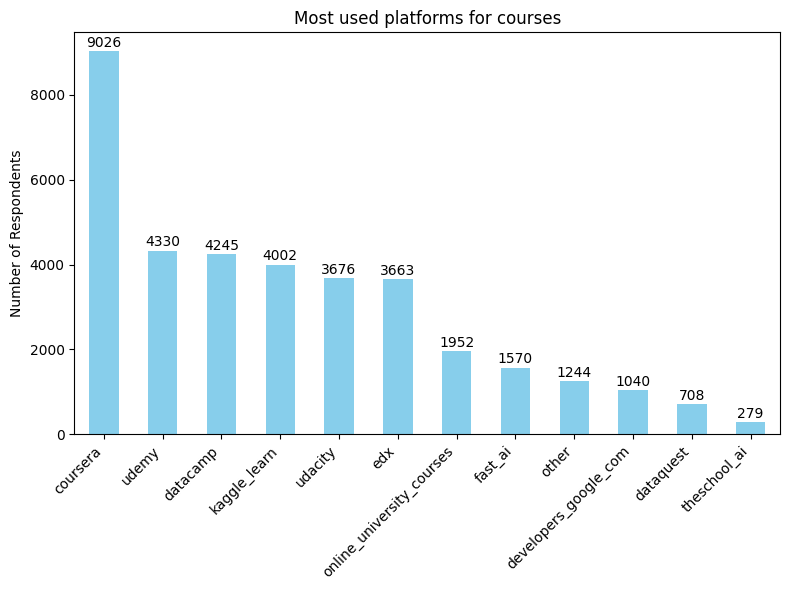

In [12]:
courses_platforms = {
    "udacity" : df['platform_used_for_courses_udacity'].sum(),
    "coursera" : df['platform_used_for_courses_coursera'].sum(),
    "edx" : df['platform_used_for_courses_edx'].sum(),
    "datacamp" : df['platform_used_for_courses_datacamp'].sum(),
    "dataquest" : df['platform_used_for_courses_dataquest'].sum(),
    "kaggle_learn" : df['platform_used_for_courses_kaggle_learn'].sum(),
    "fast_ai" : df['platform_used_for_courses_fast_ai'].sum(),
    "developers_google_com" : df['platform_used_for_courses_developers_google_com'].sum(),
    "udemy" : df['platform_used_for_courses_udemy'].sum(),
    "theschool_ai" : df['platform_used_for_courses_theschool_ai'].sum(),
    "online_university_courses" : df['platform_used_for_courses_online_university_courses'].sum(),
    "other" : df['platform_used_for_courses_other'].sum(),
}

courses_series = pd.Series(courses_platforms).sort_values(ascending=False)
plt.figure(figsize=(8,6))
ax = courses_series.plot(kind='bar', color='skyblue')

for i, v in enumerate(courses_series):
    ax.text(i, v + 100, str(v), ha='center')

plt.title('Most used platforms for courses')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
